# Dérivation et intégration numérique

Les méthodes de dérivation et d'intégration numérique sont basées sur la définition même de ces concepts mais sans le passage à la limite.

## Dérivation numérique.

### Principe
> Rappel : Soit une fonction $f$ définie et dérivable en $x_0$. Le nombre dérivée de $f$ en $x_0$ est:
> 
> $$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}$$

L'idée de la dérivation numérique est d'approcher le nombre de dérivée $f'(x_0)$ par le calcul du taux de variation précédent pour un un $h$ non nul (on approxime donc géométriquement la tangente par la corde):

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$

### Types de calcul
On distingue trois façons de calcul un nombre dérivé:

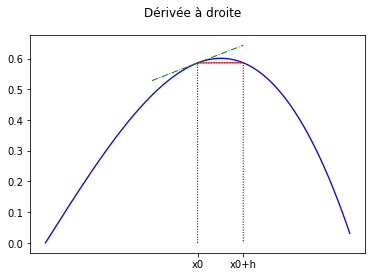

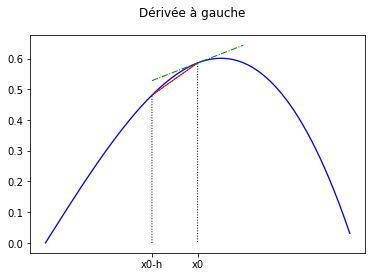

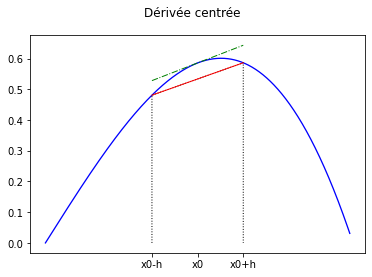

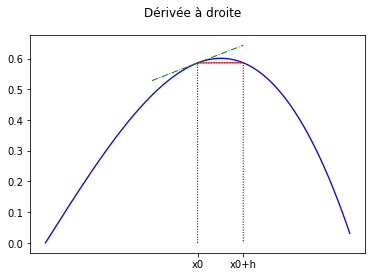

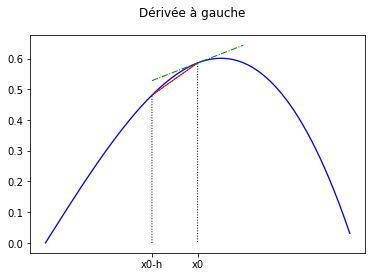

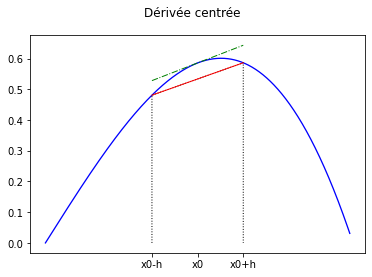

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue


def f1(x):
  return np.sin(x) - x ** 3 / 4


def df1(x):
  return (np.sqrt(2) / 2 - 3 / 4 ** 3 * np.pi ** 2) * (x - np.pi / 4) + f1(np.pi / 4)

x = np.linspace(0, np.pi / 2, 1000)
y = f1(x)

Kd = 1.3
Kg = 2 - Kd

xd = np.array([np.pi / 4, np.pi / 4 * Kd])
xd2 = np.array([np.pi / 4, np.pi / 4, np.pi / 4 * Kd, np.pi / 4 * Kd])
yd = f1(xd)
yd2 = np.append(np.insert(yd, 0, 0), 0)
xg = np.array([np.pi / 4 * Kg, np.pi / 4])
xg2 = np.array([np.pi / 4 * Kg, np.pi / 4 * Kg, np.pi / 4, np.pi / 4])
yg = f1(xg)
yg2 = np.append(np.insert(yg, 0, 0), 0)

xc = np.array([np.pi / 4 * Kg, np.pi / 4 * Kd])
xc2 = np.array([np.pi / 4 * Kg, np.pi / 4 * Kg, np.pi / 4 * Kd, np.pi / 4 * Kd])
xc3 = [np.pi / 4 * Kg, np.pi / 4, np.pi / 4 * Kd]
yc = f1(xc)
yc2 = np.append(np.insert(yc, 0, 0), 0)
dyd = df1(xc)

f, ax = plt.subplots()
f.suptitle("Dérivée à droite")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xd2, yd2, linestyle=':', linewidth=1, color="black")
ax.plot(xd, yd, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xd)
ax.set_xticklabels(["x0", "x0+h"])
glue("deriv_d", f, display="False")

f, ax = plt.subplots()
f.suptitle("Dérivée à gauche")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xg2, yg2, linestyle=':', linewidth=1, color="black")
ax.plot(xg, yg, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xg)
ax.set_xticklabels(["x0-h", "x0"])
glue("deriv_g", f, display="False")

f, ax = plt.subplots()
f.suptitle("Dérivée centrée")
ax.plot(x, y, linewidth=1.3, color="blue")
ax.plot(xc2, yc2, linestyle=':', linewidth=1, color="black")
ax.plot(xc,yc, linewidth=1, color="red", label="Dérivée numérique")
ax.plot(xc, dyd, linewidth=1, linestyle='-.', color="green", label="Dérivée réelle")
ax.set_xticks(xc3)
ax.set_xticklabels(["x0-h", "x0", "x0+h"])
glue("deriv_c", f, display="False")

````{tabbed} Dérivée à droite

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
```{glue:figure} deriv_d
:align: center
```
````

````{tabbed} Dérivée à gauche

$$ f'(x_0) \approx \frac{f(x_0) - f(x_0 - h)}{h}$$
```{glue:figure} deriv_g
:align: center
```
````

````{tabbed} Dérivée centrée

$$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 - h)}{2h}$$
```{glue:figure} deriv_c
:align: center
_Note : La dérivée centrée est en général plus précise._
```
````

### Cas étudiés et pas de calcul
En général, on estime la fonction dérivée sur un intervale $[a,b]$, soit une estimation du nombre dérivée pour plus valeur $x_i \in [a,b]$ avec un pas $h$. On distingue deux cas:
* La fonction $f$ est connue analytiquement mais on ne veut/peut pas faire le calcul analytique de la dérivée. On peut alors choisir les $x_i$ et choisir le pas de dérivation comme on veut.
```{margin} Cas des valeurs discrètes
C'est le cas en général lorsque les $y_k$ sont issus d'une mesure expérimentale par exemple.

_Note : Par manque d'information, le nombre dérivée en $x_0$ ne peut alors être calculé que par dérivation à droite et le nombre dérivée en $x_{N-1}$ (dernier échantillon) ne peut être calculé que par dérivation à gauche. Pour les autres, on a le choix._
```
* La fonction $f$ n'est pas connue. On a juste les valeurs $y_k = f(x_k)$ pour des abscisses $x_k$ (k entier dans $[0;N-1]$). On ne peut alors calculer la dérivée de $f$ qu'aux points $x_k$ et le pas d'intégration est nécessairement $h = x_{k+1} - x_k$ (_à adapter pour la dérivée à gauche et centrée_).


## Intégration numérique
(inter_pcp)=
### Principe
> Rappel : L'intégrale d'une fonction $f$ sur l'intervalle $[a; b]$ est définie par:
>
> $$I = \int_a^b f(x) dx = \lim_{N \to \infty} \sum_{i=0}^{N-1} f(x_i) \times h$$
>
> avec $x_i = a + \frac{b-a}{N}i$ et $h = \frac{b-a}{N}$

```{sidebar} Relation de récurrence

Si l'on définit $I_k = \sum_{i=0}^{k} f(x_i) \times h$, on remarque la relation de récurrence:

$$
I_{k+1} = I_k + f(x_{k+1}) \times h
$$

et $I \approx I_{N-1}$

C'est une méthode très pratique pour calculer I par une boucle.
```
L'idée de l'intégration numérique est donc d'approcher le calcul intégrale en prenant une valeur finie pour $N$, c'est-à-dire une valeur non nulle pour $h$ :

$$
I \approx \sum_{i=0}^{N-1} f(x_i) \times h
$$


### Type d'intégration
On distingue quatre types d'intégration:

````{tabbed} Méthode des rectangles à droite
On commence à $a$ et on s'arrête à $b - h$.

```{figure} ./images/rectangle_gauche.png
:name: rectangle_droite
:align: center
```
````

````{tabbed} Méthode des rectangles à gauche
On commence à $a + h$ et on s'arrête à $b$.

```{figure} ./images/rectangle_droite.png
:name: rectangle_gauche
:align: center
```
````

````{tabbed} Méthode des rectangles centrés
On commence à $a + h / 2$ et on s'arrête à $b - h / 2$.

```{figure} ./images/rectangle_milieu.png
:name: rectangle_centre
:align: center
```
````

````{tabbed} Méthode des trapèzes
L'aire d'un trapèze est:

$$
\mathcal{A} = \frac{f(a + h) + f(a)}{2}h
$$

```{figure} ./images/trapeze.png
:name: trapeze
:align: center
```
````

### Cas étudiés et pas de calcul
Comme pour la dérivation, on distingue deux cas:
* La fonction $f$ est connue analytiquement mais on ne veut/peut pas faire le calcul analytique de l'intégrale. On peut alors choisir les $x_i$ et choisir le pas d'intégration comme on veut (ou choisir N).
```{margin} Cas discret

Il est possible que le pas $h = x_{i+1} - x_i$ varie dans le cas de mesures. Ce n'est pas un problème.
```
* La fonction $f$ n'est pas connue. On a juste les valeurs $y_k = f(x_k)$ pour des abscisses $x_k$ (k entier dans $[0;N-1]$). Le pas $h$ est alors imposée par les $x_{i+1} - x_i$. On peut néanmoins toujours la méthode d'intégration.

__Dans les deux cas, la méthode par récurrence est conseillée. D'autant qu'elle permet de calculer l'intégrale sur plusieurs intervalles $[x_0, x_k]$ ($k \in [0, N-1]$). La suite $I_k$ ainsi obtenue donc une primitive (qui s'annule en $x_0$) de la fonction $f$ sur l'intervalle étudiée.__